<a href="https://colab.research.google.com/github/RitvikReddyKandanelly/DeepLearning/blob/master/Assignemnt1/Ritvik_Assignment1_Base_and_final_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from __future__ import print_function

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

batch_size = 128
num_classes = 10
epochs = 20


Using TensorFlow backend.


In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 37s 0us/step


In [4]:
# Reshaping the train and test data
x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [0]:
# Converting y variable to categorical
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
 # Adding layers to neural networks
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [0]:
# adding the optimization layer
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [12]:
# base model
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/70
50000/50000 [==============================] - 3s 66us/step - loss: 1.3505 - acc: 0.5253 - val_loss: 1.3146 - val_acc: 0.5393
Epoch 2/70
50000/50000 [==============================] - 3s 66us/step - loss: 1.3518 - acc: 0.5202 - val_loss: 1.3278 - val_acc: 0.5327
Epoch 3/70
50000/50000 [==============================] - 3s 66us/step - loss: 1.3468 - acc: 0.5273 - val_loss: 1.3126 - val_acc: 0.5409
Epoch 4/70
50000/50000 [==============================] - 3s 66us/step - loss: 1.3484 - acc: 0.5253 - val_loss: 1.3103 - val_acc: 0.5373
Epoch 5/70
50000/50000 [==============================] - 3s 66us/step - loss: 1.3455 - acc: 0.5257 - val_loss: 1.3237 - val_acc: 0.5372
Epoch 6/70
50000/50000 [==============================] - 3s 66us/step - loss: 1.3419 - acc: 0.5269 - val_loss: 1.3084 - val_acc: 0.5416
Epoch 7/70
50000/50000 [==============================] - 3s 66us/step - loss: 1.3373 - acc: 0.5275 - val_loss: 1.3113 - val_acc

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.385002778625488
Test accuracy: 0.0948


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 700)               2151100   
_________________________________________________________________
dropout_3 (Dropout)          (None, 700)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 700)               490700    
_________________________________________________________________
dropout_4 (Dropout)          (None, 700)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                7010      
Total params: 2,648,810
Trainable params: 2,648,810
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/70
50000/50000 [==============================] - 4s 78us/step - loss: 2.0

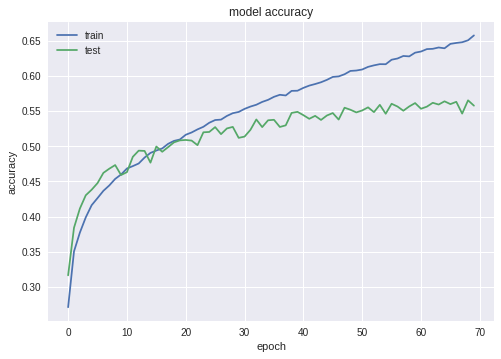

In [9]:
# best model after base model
batch_size = 128
epochs = 70

model = Sequential()
model.add(Dense(700, activation='hard_sigmoid', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(700, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


import matplotlib.pyplot as plt
import numpy

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 700)               2151100   
_________________________________________________________________
dropout_5 (Dropout)          (None, 700)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 700)               490700    
_________________________________________________________________
dropout_6 (Dropout)          (None, 700)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                7010      
Total params: 2,648,810
Trainable params: 2,648,810
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/70
50000/50000 [==============================] - 4s 73us/step - loss: 2.0

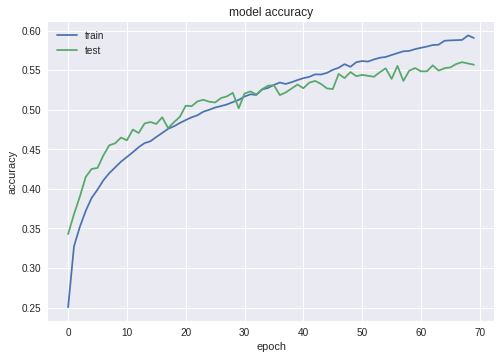

In [10]:
trying with lass neurons
batch_size = 128
epochs = 70

model = Sequential()
model.add(Dense(700, activation='hard_sigmoid', input_shape=(3072,)))
model.add(Dropout(0.4))
model.add(Dense(700, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


import matplotlib.pyplot as plt
import numpy

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 700)               2151100   
_________________________________________________________________
dropout_7 (Dropout)          (None, 700)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 700)               490700    
_________________________________________________________________
dropout_8 (Dropout)          (None, 700)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                7010      
Total params: 2,648,810
Trainable params: 2,648,810
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/70
50000/50000 [==============================] - 4s 73us/step - loss: 2.1

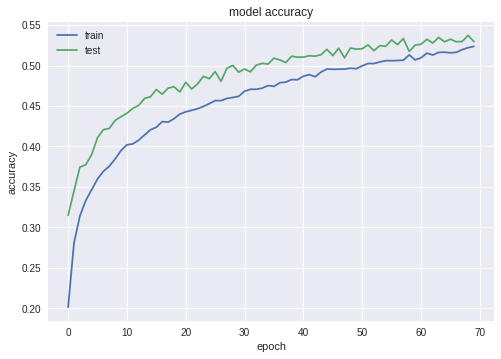

In [11]:
# by training the best model twice the difference betweeen 
batch_size = 128
epochs = 70

model = Sequential()
model.add(Dense(700, activation='hard_sigmoid', input_shape=(3072,)))
model.add(Dropout(0.6))
model.add(Dense(700, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


import matplotlib.pyplot as plt
import numpy

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 500)               1536500   
_________________________________________________________________
dropout_11 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 500)               250500    
_________________________________________________________________
dropout_12 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                5010      
Total params: 1,792,010
Trainable params: 1,792,010
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/70
50000/50000 [==============================] - 4s 75us/step - loss: 2.0

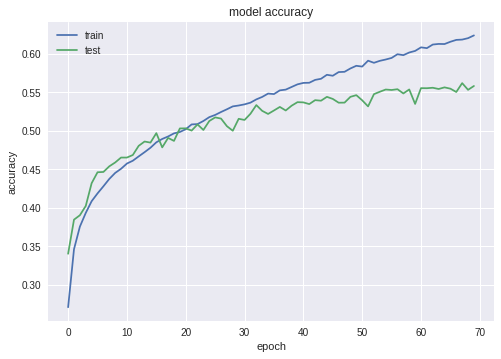

In [14]:
batch_size = 128
epochs = 70

model = Sequential()
model.add(Dense(500, activation='hard_sigmoid', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


import matplotlib.pyplot as plt
import numpy

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()